In [1]:
#pip install tensorflow

### Use a Neural Network to found the relationship between time and temperature while using a chiller

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random

In [4]:
# Set the seed for Python's built-in random module
random.seed(88)

# Set the seed for NumPy
np.random.seed(88)

# Set the seed for TensorFlow
tf.random.set_seed(88)

In [50]:
test_data_file_path = 'testing_values.xlsx'
test_data = pd.ExcelFile(test_data_file_path)

sheet_names = test_data.sheet_names
print(*sheet_names, sep='\n')

PumpV with Flow rate
Rubber tube flow testing
12V pump-3 fan - temp testing
7V pump-3 fan- temp testing
3.5V pump-3 fan- temp testing
3.5V pump-no fan-temp testing
12V pump-no fan-temp testing
7.5V pump-no fan- temp testing
12V pump - 1 fan - temp testin 
7V pump-1 fan-tem testing
3.5V-1 fan-temp testing
12V pump-2 fan-temp testing
7V pump-2 fan-temp testing
3.5V pump-2 fan-temp testing
12V pump-chiller-temp testing
7V pump-chiller-temp testing
3.5V pump-chiller-temp testing


In [52]:
def data_extraction(excel_sheet):
    """
    This function converts the information of one excel sheet.

    Paramters functionalities:

    header = 0 := means that in the sheet the first row will be 
    consider as the headers of the dataframe.

    usecols = range(3) := means that you are going to use only the first 3 columns
    in case you need to use from column 3 to 6 the range function should be used as 
    range(3,6)
    
    """
    data = pd.read_excel(test_data_file_path, excel_sheet, header=0, usecols=range(3))
    return data.ffill()

In [54]:
# Variable names

time = 'Time (min)'
temp = 'Temperature (Celcius)'

temp_plot = 'Temperature (Celsius)'

In [56]:
# Extract all data related to a chiller.

volts = ['7']
chiller = {}

for volt in volts:
    for excel_sheet in sheet_names:
        if volt+'V' in excel_sheet and 'chiller' in excel_sheet:
            chiller[volt] = data_extraction(excel_sheet)

34.39


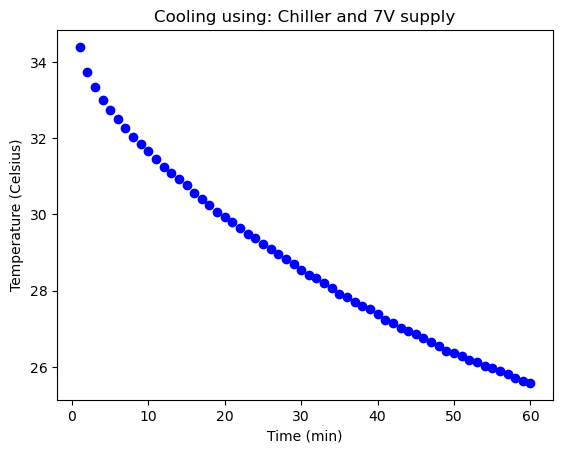

In [58]:
# Plot the 3 of them in the same plot to see the behavior
print(chiller[volt][temp].iloc[0])
for volt in volts:
    x = chiller[volt][time] 
    y = chiller[volt][temp]
    plt.scatter(x,y, label=f'{volt} V', color='blue')

plt.title('Cooling using: Chiller and 7V supply')
plt.ylabel(temp_plot)
plt.xlabel(time)
#plt.legend()
plt.savefig('Rep 3/chiller_7v_behavior.png')
plt.show()

### Divide data into training and testing data for each voltage

In [61]:
from sklearn.model_selection import train_test_split

x_train = {}
y_train = {}

x_test = {}
y_test = {}

for volt in volts:
    data = chiller[volt]
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=88)
    
    # Sorting the training data based on time
    sorted_train_data = sorted(zip(train_data[time].values, train_data[temp].values))
    x_train[volt] = np.array(sorted_train_data)[:, 0].reshape(-1, 1)
    y_train[volt] = np.array(sorted_train_data)[:, 1].reshape(-1, 1)
    
    # Extracting test data for x_test and y_test and sorting them based on time
    sorted_test_data = sorted(zip(test_data[time].values, test_data[temp].values))
    x_test[volt] = np.array(sorted_test_data)[:, 0].reshape(-1, 1)
    y_test[volt] = np.array(sorted_test_data)[:, 1].reshape(-1, 1)

### Train each Neural Network

In [64]:
from keras.layers import Input, Dense
from keras.models import Model

num_layers = 20 # Define the number of hidden layers

input_layer = Input(shape=(1,))
x = input_layer

for _ in range(num_layers):
    x = Dense(128, activation='relu')(x)  # Add a hidden layer with 128 nodes and ReLU activation

output_layer = Dense(1)(x)  # Define the output layer

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')  # Compile the model

In [66]:
histories = {}
for volt in volts:
    histories[volt] = model.fit(x_train[volt], y_train[volt], epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - loss: 880.4211 - val_loss: 678.0513
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 875.8381 - val_loss: 632.2524
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 847.2585 - val_loss: 411.8591
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 712.7662 - val_loss: 8.8906
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 342.6759 - val_loss: 2357.6792
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 501.4014 - val_loss: 149.6579
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 283.5576 - val_loss: 2.9452
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 364.7979 - val_loss: 8.2448
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 333.3097 - val_loss: 257.1867
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 253.6927 - val_loss: 1316.3956
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 337.4057 - val_loss: 738.2254
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━

In [67]:
# Verify the loss in each experiment

losses = {}
for volt in volts:
    losses[volt] = model.evaluate(x_test[volt], y_test[volt])
    print(f'Loss en los datos de prueba: {losses[volt]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0576
Loss en los datos de prueba: 0.0576472245156765


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
R²: 98.94%
MSE: 0.06


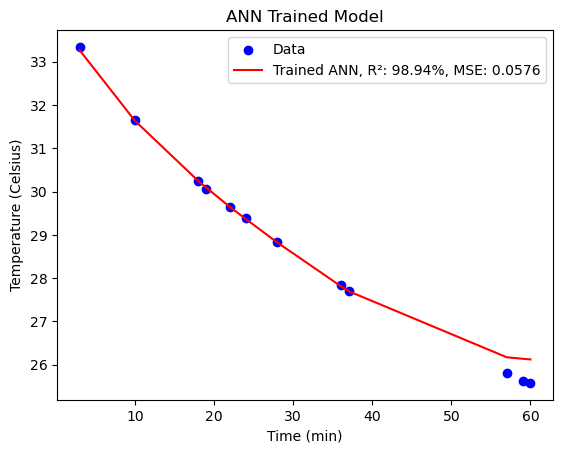

In [68]:
# Predictions
from sklearn.metrics import r2_score, mean_squared_error

predictions = {}
accuracies = {}
r2s = {}
mses = {}

for volt in volts:
    predictions[volt] = model.predict(x_test[volt])
    r2s[volt] = r2_score(y_test[volt], predictions[volt])
    mses[volt] = mean_squared_error(y_test[volt], predictions[volt])
    print(f'R\u00b2: {r2s[volt]:.2%}', f'MSE: {mses[volt]:.2f}', sep='\n')
    plt.scatter(x_test[volt], y_test[volt], label=f'Data', color='blue')
    plt.plot(x_test[volt], predictions[volt], label=f"Trained ANN, R\u00b2: {r2s['7']:.2%}, MSE: {mses['7']:.4f}", color='r')
    plt.title('ANN Trained Model')
    plt.xlabel(time)
    plt.ylabel(temp_plot)
    plt.legend()
    plt.savefig('Rep 3/pred_chiller_using_ANN.png')
    plt.show()

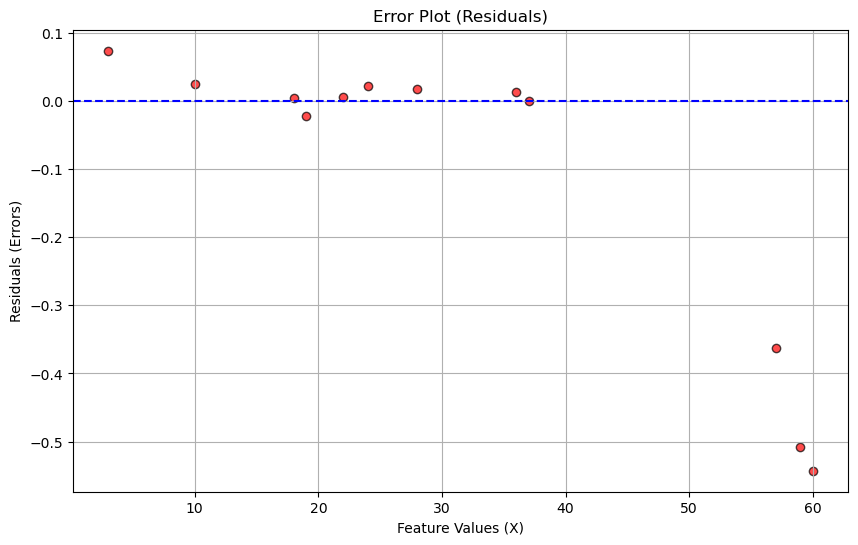

In [69]:
x = x_test['7']
y = y_test['7']
y_pred = predictions['7']


error_ann = y-y_pred
plt.figure(figsize=(10, 6))
plt.scatter(x, error_ann, color='red', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Feature Values (X)')
plt.ylabel('Residuals (Errors)')
plt.title('Error Plot (Residuals)')
plt.grid(True)
plt.show()

### Compare residuals plot from ANN vs EXp + lineal function

-0.0962621124952743


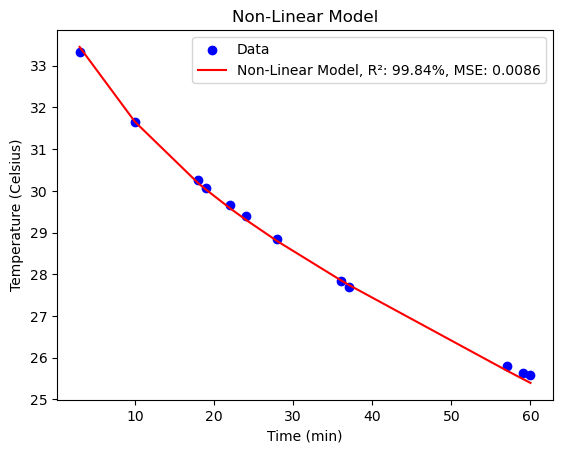

In [95]:
from scipy.optimize import curve_fit

def inverse(t, a, b, c, d):    
    return a * t + b*np.exp(-c*t/1000) +d


xtr_math = x_train['7'].flatten()
xtst_math = x_test['7'].flatten()

ytr_math = y_train['7'].flatten()
ytst_math = y_test['7'].flatten()

popt, pcov = curve_fit(inverse, xtr_math, ytr_math, maxfev=10000)
print(popt[0])
y_fit_math = inverse(xtst_math, *popt)
r2_math = r2_score(ytst_math, y_fit_math)
mse_math = mean_squared_error(ytst_math, y_fit_math)


plt.scatter(x_test['7'], y_test['7'], color = 'blue', label = 'Data')
plt.plot(xtst_math, y_fit_math, label = f'Non-Linear Model, R\u00b2: {r2_math:.2%}, MSE: {mse_math:.4f}', color = 'red')
#plt.plot(x_test['7'], predictions['7'], label = f"ANN Model, R\u00b2: {r2s['7']:.2%}, MSE: {mses['7']:.4f}", color = 'green')

plt.title('Non-Linear Model')
plt.xlabel(time)
plt.ylabel(temp_plot)
plt.legend()
plt.savefig('Rep 3/pred_chiller_using_non_linear.png')
plt.show()

0.08076151006232234


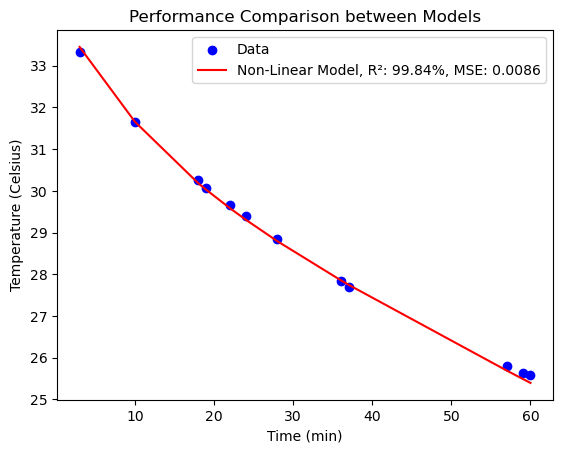

In [128]:
from scipy.optimize import curve_fit

def inverse(t,a, b, c, d):    
    return a*t + b*np.exp(-c*t/1000) +d


xtr_math = x_train['7'].flatten()
xtst_math = x_test['7'].flatten()

ytr_math = y_train['7'].flatten()
ytst_math = y_test['7'].flatten()

popt, pcov = curve_fit(inverse, xtr_math, ytr_math, maxfev=2000)
print( popt[2]/1000)

y_fit_math = inverse(xtst_math, *popt)
r2_math = r2_score(ytst_math, y_fit_math)
mse_math = mean_squared_error(ytst_math, y_fit_math)


plt.scatter(x_test['7'], y_test['7'], color = 'blue', label = 'Data')
plt.plot(xtst_math, y_fit_math, label = f'Non-Linear Model, R\u00b2: {r2_math:.2%}, MSE: {mse_math:.4f}', color = 'red')
#plt.plot(x_test['7'], predictions['7'], label = f"ANN Model, R\u00b2: {r2s['7']:.2%}, MSE: {mses['7']:.4f}", color = 'green')

plt.title('Performance Comparison between Models')
plt.xlabel(time)
plt.ylabel(temp_plot)
plt.legend()
plt.savefig('Rep 3/ann_vs_non_linear.png')
plt.show()

### Compare residuals plot

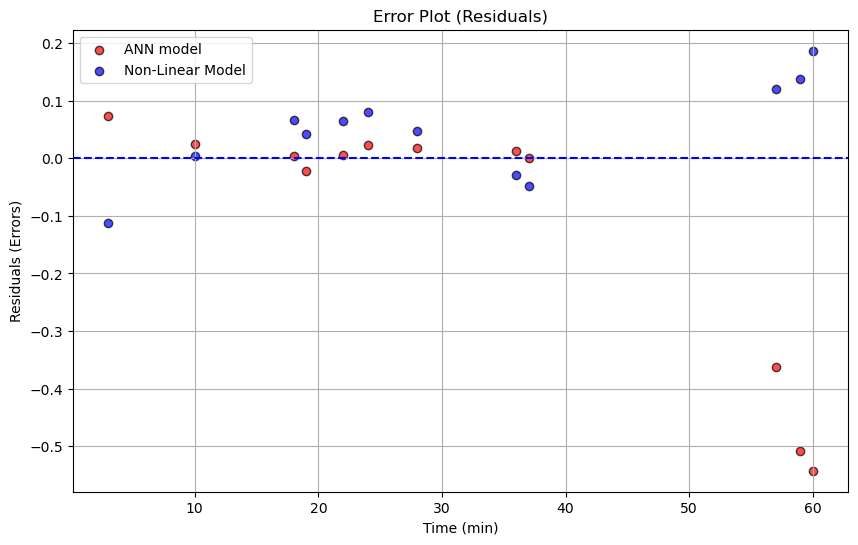

In [74]:
# Data for ANN
x_ann = x_test['7']
y_ann = y_test['7']
y_pred = predictions['7']
error_ann = y_ann - y_pred

# Data for Theorical Model
x_math = xtst_math
y_math = ytst_math
y_fit = y_fit_math
error_math = y_math - y_fit_math

error_ann = (y-y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(x_ann, error_ann, color='red', edgecolor='k', alpha=0.7, label = 'ANN model')
plt.scatter(x_math, error_math, color='blue', edgecolor='k', alpha=0.7, label = 'Non-Linear Model')

plt.legend()
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel(time)
plt.ylabel('Residuals (Errors)')
plt.title('Error Plot (Residuals)')
plt.grid(True)
plt.savefig('Rep 3/residual_plot_ann_vs_non_linear.png')
plt.show()

In [75]:
from scipy.optimize import fsolve
from scipy.optimize import minimize

opt_max = 27 
opt_min = 23
opt_mid = (opt_max + opt_min)/2

# Define the function
def inverse(t, a, b, c ,d):
    return a * t + b * np.exp(-c * t / 1000) + d

# Parameters from your fitted curve
a, b, c, d = popt

# Specific temperatures you want to reach
temperatures = [opt_min, opt_mid, opt_max]  # Replace with the desired temperatures

# Function to solve for time
def find_time_for_temperature(T):
    def objective(t):
        return (inverse(t, a, b, c, d) - T)**2
    
    # Initial guess for t
    initial_guess = 60
    
    # Solve for t using minimize
    result = minimize(objective, initial_guess, method='Nelder-Mead')
    return result.x[0]

# Calculate the time for each temperature
times = [find_time_for_temperature(T) for T in temperatures]

for T, t in zip(temperatures, times):
    print(f"The time to reach the {T:.0f} Celsius is {t:.2f} minutes.")

The time to reach the 23 Celsius is 84.63 minutes.
The time to reach the 25 Celsius is 64.01 minutes.
The time to reach the 27 Celsius is 44.02 minutes.


### Plot 2 fan 7V against chiller 7V

In [77]:
radiator = '7V pump-2 fan-temp testing'
chill = '7V pump-chiller-temp testing'

radiator_data = data_extraction(radiator)
chiller_data = data_extraction(chill)

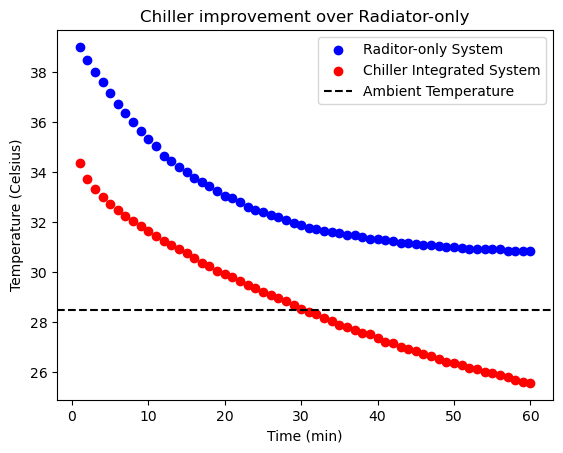

In [78]:
rad_x = radiator_data['Time (min)']
rad_y = radiator_data['Temperature (Celcius)']

chill_x = chiller_data['Time (min)']
chill_y = chiller_data['Temperature (Celcius)']

plt.scatter(rad_x, rad_y, label='Raditor-only System', color='blue')
plt.scatter(chill_x, chill_y, label='Chiller Integrated System', color='red')
plt.axhline(y=28.5, color='black', linestyle='--', label='Ambient Temperature')

plt.title('Chiller improvement over Radiator-only')
plt.xlabel(time)
plt.ylabel(temp_plot)
plt.legend()
plt.savefig('Rep 3/chiller_improvement_over_rad.png')
plt.show()

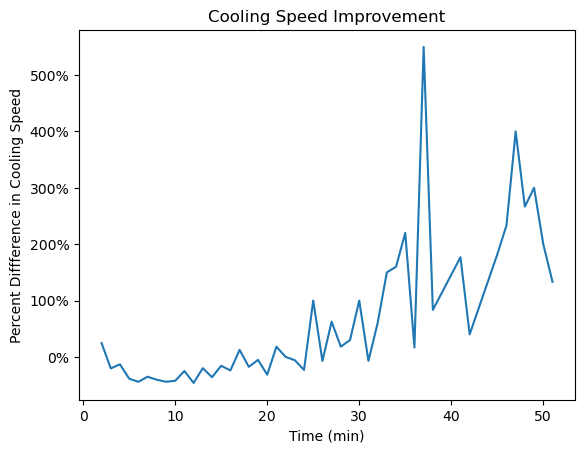

In [83]:
pd.set_option('display.precision', 10)


repeated = radiator_data[radiator_data.duplicated(subset=['Temperature (Celcius)'], keep=False)]

radiator_data = radiator_data[~radiator_data.index.isin(repeated.index)]
chiller_data = chiller_data[~chiller_data.index.isin(repeated.index)]



radiator_data['Cooling Speed'] = -radiator_data['Temperature (Celcius)'].diff()
chiller_data['Cooling Speed'] = -chiller_data['Temperature (Celcius)'].diff()




start = 1
speed_rad = radiator_data['Cooling Speed'].iloc[start:]
speed_chill = chiller_data['Cooling Speed'].iloc[start:]



improvement = (speed_chill-speed_rad)/speed_rad

plt.plot(radiator_data['Time (min)'][start:], improvement)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
plt.xlabel(time)
plt.ylabel('Percent Diffference in Cooling Speed')
plt.title('Cooling Speed Improvement')

plt.savefig('Rep 3/percentage_cooling_speed_improvement.png')
plt.show()